<a href="https://colab.research.google.com/github/sampath11/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Sam_Kumar_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# TODO - code!

import numpy as np
import matplotlib.pyplot as plt

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive_drunk, prob_positive):
  return (prob_drunk_prior * prob_positive_drunk) / prob_positive

In [0]:
# scenario for breathalyzer test in the lecture
prob_drunk_given_positive(0.001, 1, 0.08)

0.0125

In [0]:
# One more scenario

prob_drunk_given_positive(0.001, 0.8, 0.1)

0.008

In [1]:
# Explore scipy.stats.bayes_mvs - read its documentation, and experiment with it on data you've tested in other ways earlier this week

import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/bs3537/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/master/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [2]:
## Will compare US suicide rate for 2015 and 1985 using bayesian and frequentist techniques
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [6]:
df_country = df[df['country'] == "United States"]
df_country.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [7]:
print (df_country['year'].max(), df_country['year'].min())

2015 1985


In [10]:
df_yr85 = df_country[df_country['year'] == 1985]

df_yr85.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [13]:
df_yr85

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X
26853,United States,1985,female,35-54 years,2105,27763000,7.58,United States1985,0.841,"4,346,734,000,000",19693,Silent
26854,United States,1985,female,55-74 years,1568,21366000,7.34,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26855,United States,1985,female,75+ years,466,7469000,6.24,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26856,United States,1985,female,25-34 years,1242,21041000,5.90,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26857,United States,1985,female,15-24 years,854,19589000,4.36,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [12]:
df_yr85.count()

country               12
year                  12
sex                   12
age                   12
suicides_no           12
population            12
suicides/100k pop     12
country-year          12
HDI for year          12
 gdp_for_year ($)     12
gdp_per_capita ($)    12
generation            12
dtype: int64

In [14]:
df_yr85 = df_yr85['suicides/100k pop']

df_yr85.head(20)

26848    53.57
26849    29.50
26850    24.46
26851    22.77
26852    21.38
26853     7.58
26854     7.34
26855     6.24
26856     5.90
26857     4.36
26858     1.18
26859     0.44
Name: suicides/100k pop, dtype: float64

In [21]:
df_yr85.describe()

count    12.000000
mean     15.393333
std      15.597443
min       0.440000
25%       5.515000
50%       7.460000
75%      23.192500
max      53.570000
Name: suicides/100k pop, dtype: float64

In [18]:
df_yr15 = df_country[df_country['year'] == 2015]

df_yr15.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27208,United States,2015,male,75+ years,3171,8171136,38.81,United States2015,NaN,"18,120,714,000,000",60387,Silent
27209,United States,2015,male,55-74 years,9068,32264697,28.11,United States2015,NaN,"18,120,714,000,000",60387,Boomers
27210,United States,2015,male,35-54 years,11634,41658010,27.93,United States2015,NaN,"18,120,714,000,000",60387,Generation X
27211,United States,2015,male,25-34 years,5503,22137097,24.86,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27212,United States,2015,male,15-24 years,4359,22615073,19.27,United States2015,NaN,"18,120,714,000,000",60387,Millenials


In [19]:
df_yr15 = df_yr15['suicides/100k pop']

df_yr15.head(20)

27208    38.81
27209    28.11
27210    27.93
27211    24.86
27212    19.27
27213     9.76
27214     8.18
27215     6.70
27216     5.23
27217     4.58
27218     1.20
27219     0.78
Name: suicides/100k pop, dtype: float64

In [20]:
df_yr15.describe()

count    12.000000
mean     14.617500
std      12.646263
min       0.780000
25%       5.067500
50%       8.970000
75%      25.627500
max      38.810000
Name: suicides/100k pop, dtype: float64

In [0]:
df_suicide = df_yr15['']

In [0]:
Bayesian method, using alpha =0.95, for measuring 95% confidence intervals
# this function also returns the confidence intervals.

stats.bayes_mvs(df8, alpha=0.95)

In [0]:
## Now lets use the ttest for yr 1985 and yr 2015

from scipy import stats

from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [24]:
ttest_ind(df_yr85, df_yr15, equal_var=False)

Ttest_indResult(statistic=0.1338426064235618, pvalue=0.8947955182545053)

## We see that p -value from ttest_ind is > 0.05, this indicates that NULL HYPOTHESIS is TRUE, i.e there is no differene between suicide rates in US between 1985 an 2015

## Resources

In [0]:
# combine both year

In [0]:
df_full_suicide = pd.concat ([df_yr15, df_yr85])

In [30]:
df_full_suicide.count()

24

In [32]:
df_full_suicide.describe()

count    24.000000
mean     15.005417
std      13.892290
min       0.440000
25%       5.067500
50%       7.880000
75%      24.560000
max      53.570000
Name: suicides/100k pop, dtype: float64

In [31]:
# Bayesian method, using alpha =0.95, for measuring 95% confidence intervals
# this function also returns the confidence intervals.

stats.bayes_mvs(df_full_suicide, alpha=0.95)

# first line of the output gives the mean and 95% CI using Bayesian method

(Mean(statistic=15.005416666666667, minmax=(9.13921707799783, 20.871616255335503)),
 Variance(statistic=211.37626646825393, minmax=(116.58118109641525, 379.76488664149105)),
 Std_dev(statistic=14.366794760928489, minmax=(10.797276559226184, 19.487557226124853)))

In [38]:
# frequentist and Bayesian approach means are same = 15.005

means = 15.005, 15.005

# standard deviation by frequentist method = 13.89
# standard deviation by Bayesian method = 14.36

stdevs = 14.36, 13.89
dist = pd.DataFrame(
    np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
    columns=['frequentist', 'Bayesian'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

    

,frequentist,Bayesian
min,-29.95,-32.45
max,58.23,60.57
mean,15.01,15.16
std,13.77,13.55


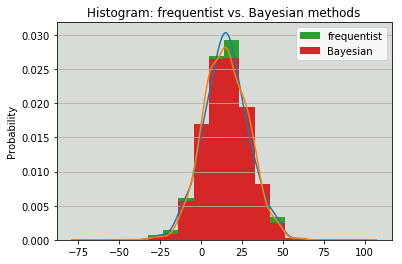

In [39]:
fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: frequentist vs. Bayesian methods')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

##We can see that Bayesian approach relies heavily on prior information while frequentist approach does not rely on prior information.

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)